# Bank Marketing csv

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are 21 columns and 41188 rows in this dataset. We have imported all the necessary files and libraries. We also filled the null values with mean and did the visualization using seaborn, pyplot, matplotlib.

Variables - age, job, marital, education,  default, housing, loan, contact, month, day_of_week, duration,  campaign, pdays , previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y.

We will perform Classification on this dataset.

## Importing liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read csv file 

In [2]:
bnk = pd.read_csv(r"C:\Users\SST190000\Downloads\Applied ML\archive\bank_marketing.csv", sep = ';')

In [3]:
bnk

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Getting information about the dataset 

In [4]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bnk.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bnk.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bnk.shape

(41188, 21)

## Check for Duplicates and Null values

In [8]:
bnk.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
bnk.duplicated().sum()

12

In [10]:
duplicates = bnk[bnk.duplicated()]
print("Duplicate rows : ")
duplicates

Duplicate rows : 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


## Drop duplicates

In [11]:
bnk.drop_duplicates(keep=False, inplace=True)

In [12]:
bnk.duplicated().sum()

0

In [13]:
bnk.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Imputing 5%-10% null values

In [14]:
bnk['emp.var.rate'] = bnk['emp.var.rate'].mask(np.random.random(bnk['emp.var.rate'].shape) < .1)
bnk['duration'] = bnk['duration'].mask(np.random.random(bnk['duration'].shape) < .05)
bnk['campaign'] = bnk['campaign'].mask(np.random.random(bnk['campaign'].shape) < .1)
bnk['pdays'] = bnk['pdays'].mask(np.random.random(bnk['pdays'].shape) < .1)
bnk['previous'] = bnk['previous'].mask(np.random.random(bnk['previous'].shape) < .05)

In [15]:
bnk.isna().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration          2047
campaign          4003
pdays             4120
previous          2048
poutcome             0
emp.var.rate      4222
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [16]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41164 non-null  int64  
 1   job             41164 non-null  object 
 2   marital         41164 non-null  object 
 3   education       41164 non-null  object 
 4   default         41164 non-null  object 
 5   housing         41164 non-null  object 
 6   loan            41164 non-null  object 
 7   contact         41164 non-null  object 
 8   month           41164 non-null  object 
 9   day_of_week     41164 non-null  object 
 10  duration        39117 non-null  float64
 11  campaign        37161 non-null  float64
 12  pdays           37044 non-null  float64
 13  previous        39116 non-null  float64
 14  poutcome        41164 non-null  object 
 15  emp.var.rate    36942 non-null  float64
 16  cons.price.idx  41164 non-null  float64
 17  cons.conf.idx   41164 non-null 

## Replace null values with mean 

In [17]:
bnk['emp.var.rate'].fillna(bnk['emp.var.rate'].mean(),inplace=True)

In [18]:
bnk['duration'].fillna(bnk['duration'].mean(),inplace=True)

In [19]:
bnk['campaign'].fillna(bnk['campaign'].mean(),inplace=True)

In [20]:
bnk['pdays'].fillna(bnk['pdays'].mean(),inplace=True)

In [21]:
bnk['previous'].fillna(bnk['previous'].mean(),inplace=True)

In [22]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41164 non-null  int64  
 1   job             41164 non-null  object 
 2   marital         41164 non-null  object 
 3   education       41164 non-null  object 
 4   default         41164 non-null  object 
 5   housing         41164 non-null  object 
 6   loan            41164 non-null  object 
 7   contact         41164 non-null  object 
 8   month           41164 non-null  object 
 9   day_of_week     41164 non-null  object 
 10  duration        41164 non-null  float64
 11  campaign        41164 non-null  float64
 12  pdays           41164 non-null  float64
 13  previous        41164 non-null  float64
 14  poutcome        41164 non-null  object 
 15  emp.var.rate    41164 non-null  float64
 16  cons.price.idx  41164 non-null  float64
 17  cons.conf.idx   41164 non-null 

# Exploratory Data Analysis

## Exploring numerical variables in 'bnk'

### Histogram Subplots

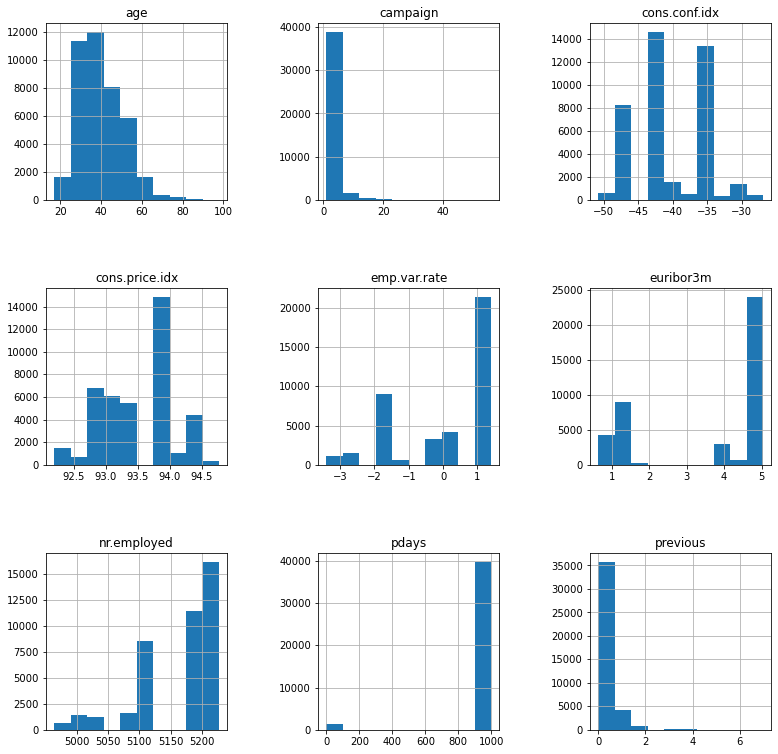

In [23]:
col = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
bnk.hist(column=col,figsize=(13,13))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

### Distribution of age variable

Text(0.5, 1.0, 'Age Distribution')

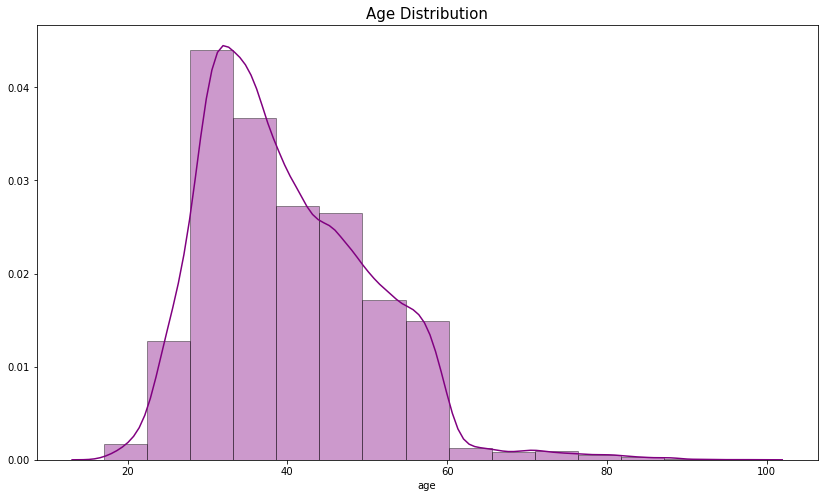

In [24]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.distplot(bnk['age'], hist=True, kde=True, 
             bins=int(150/10), color = 'purple',
             hist_kws={'edgecolor':'black'})
bca.set_title('Age Distribution', fontsize=15)

### Count of Duration

Text(0.5, 1.0, 'Count of Duration')

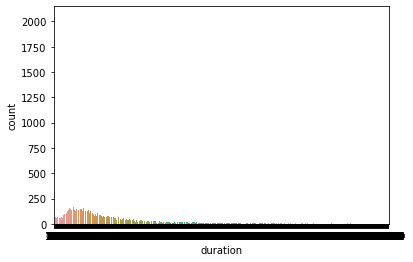

In [25]:
sns.countplot(x='duration',data=bnk)
bca.set_title('Count of Duration', fontsize=15)

### Count of cons.price.idx

Text(0.5, 1.0, 'Count of cons.price.idx')

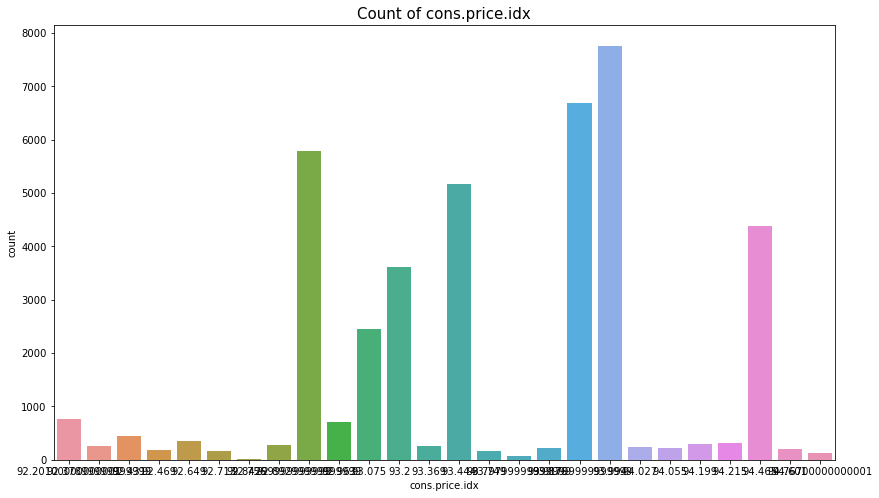

In [26]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.countplot(x='cons.price.idx',data=bnk)
bca.set_title('Count of cons.price.idx', fontsize=15)

### Count of emp.var.rate

Text(0.5, 1.0, 'Count of emp.var.rate')

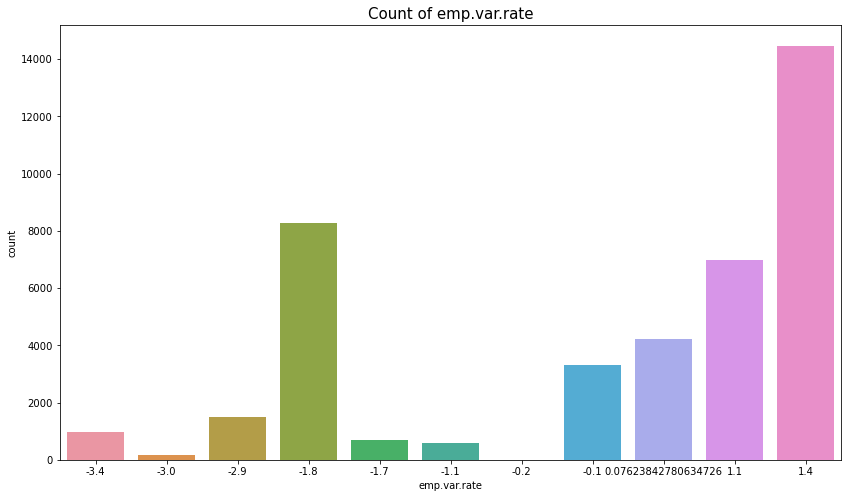

In [27]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.countplot(x='emp.var.rate',data=bnk)
bca.set_title('Count of emp.var.rate', fontsize=15)

### Count of cons.conf.idx

Text(0.5, 1.0, 'Count of cons.conf.idx')

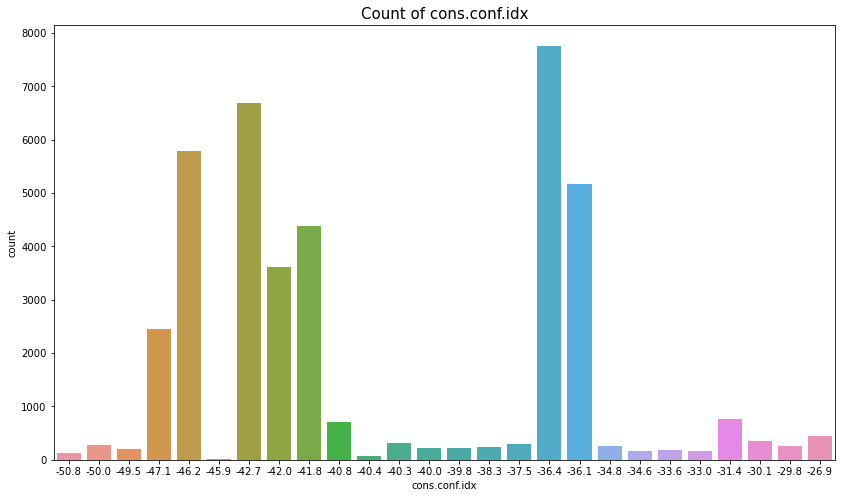

In [28]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.countplot(x='cons.conf.idx',data=bnk)
bca.set_title('Count of cons.conf.idx', fontsize=15)

### Count of euribor3m

Text(0.5, 1.0, 'Count of euribor3m')

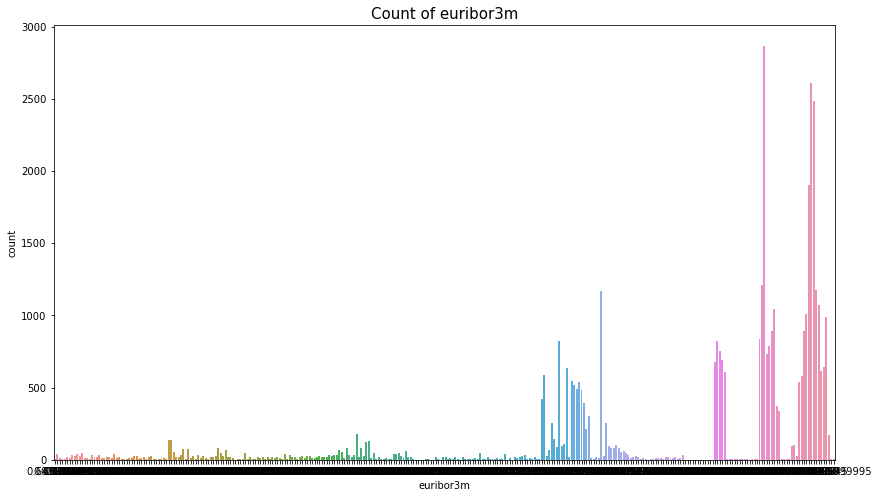

In [29]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.countplot(x='euribor3m',data=bnk)
bca.set_title('Count of euribor3m', fontsize=15)

## Exploring variation of numerical variables w.r.t target variable y

### Variation in age

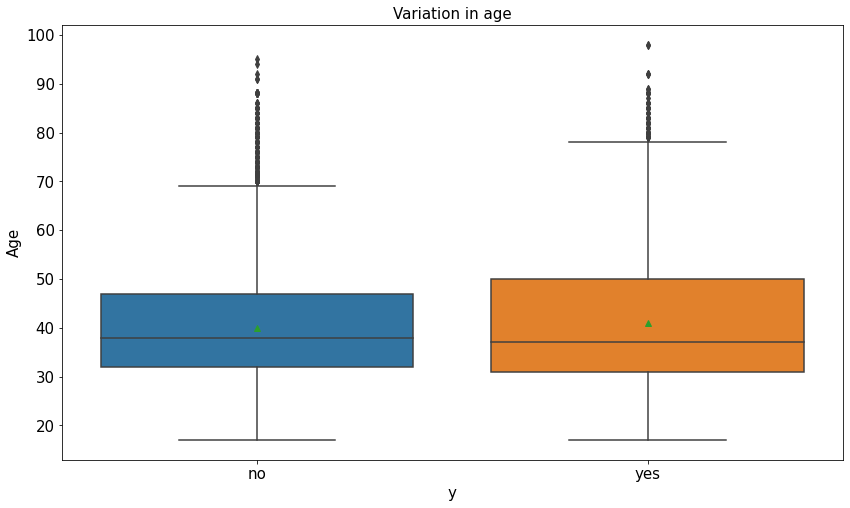

In [30]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'age', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Age', fontsize=15)
bca1.set_title('Variation in age', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in duration

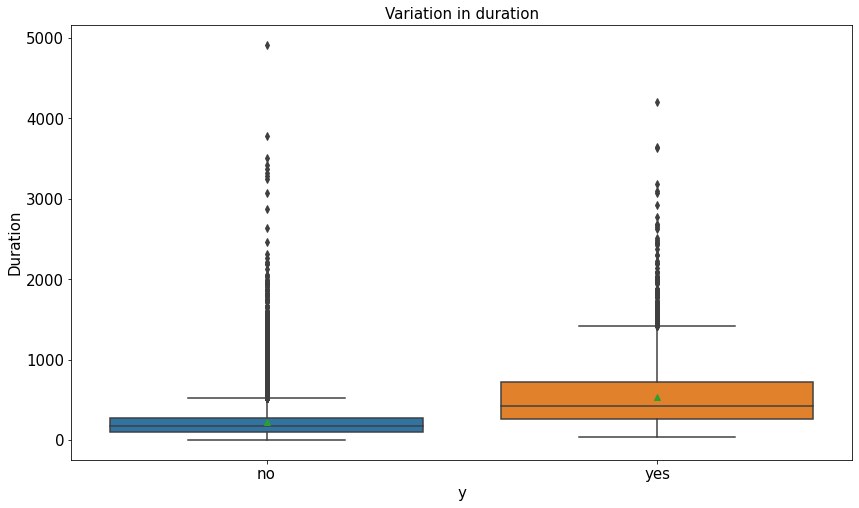

In [31]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'duration', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Duration', fontsize=15)
bca1.set_title('Variation in duration', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Campaign

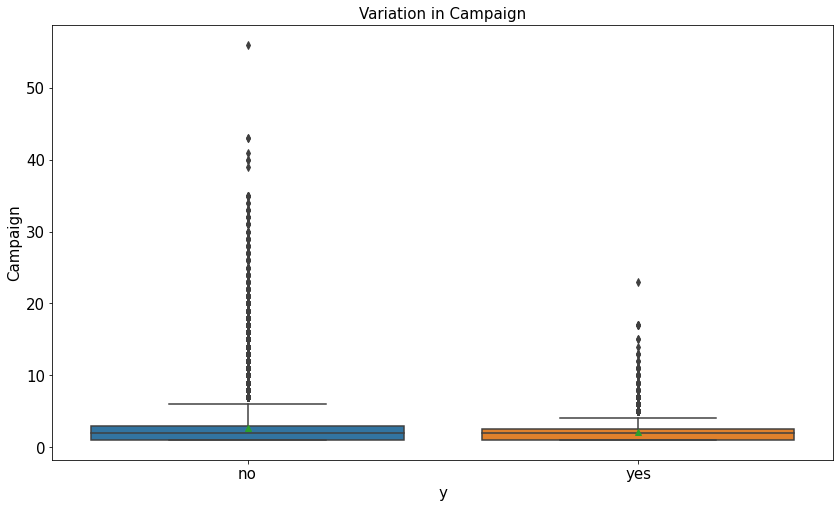

In [32]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'campaign', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Campaign', fontsize=15)
bca1.set_title('Variation in Campaign', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Pdays

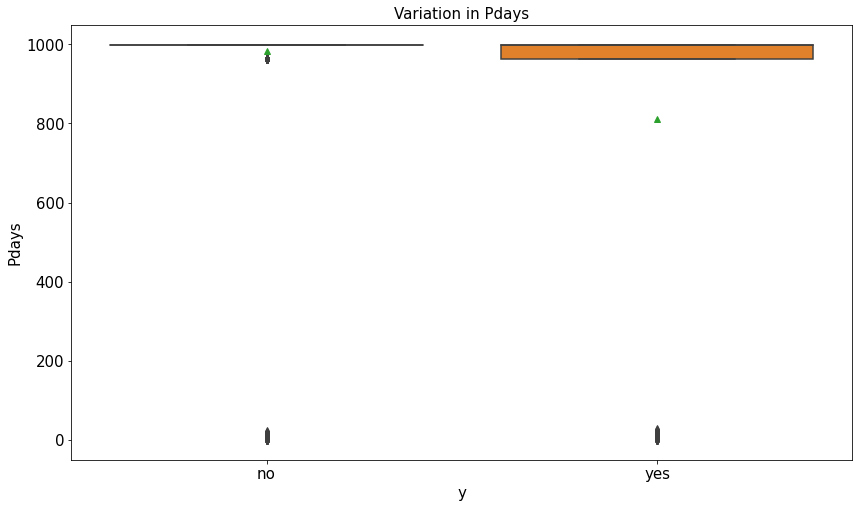

In [33]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'pdays', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Pdays', fontsize=15)
bca1.set_title('Variation in Pdays', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Previous

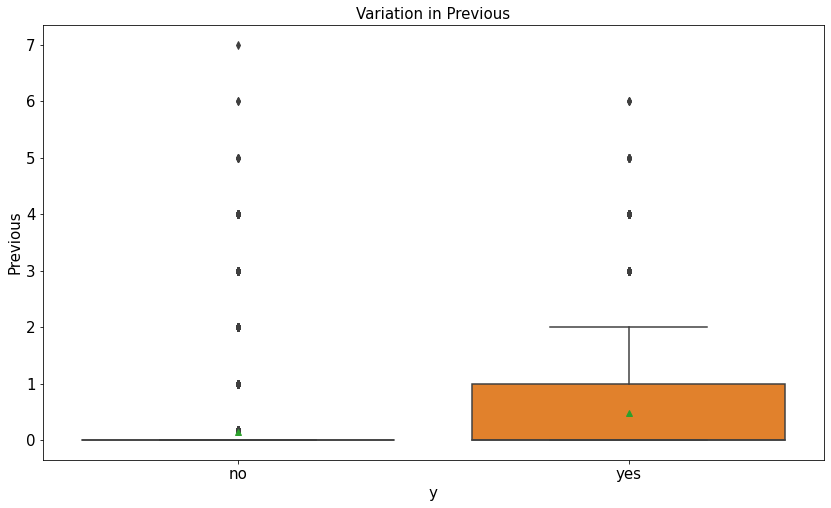

In [34]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'previous', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Previous', fontsize=15)
bca1.set_title('Variation in Previous', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Emp.Var.Rate

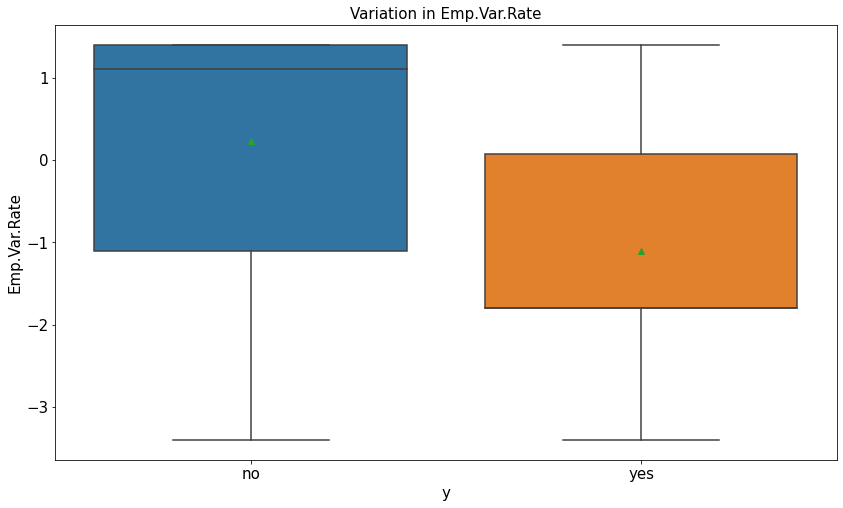

In [35]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'emp.var.rate', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Emp.Var.Rate', fontsize=15)
bca1.set_title('Variation in Emp.Var.Rate', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Cons.Price.Idx

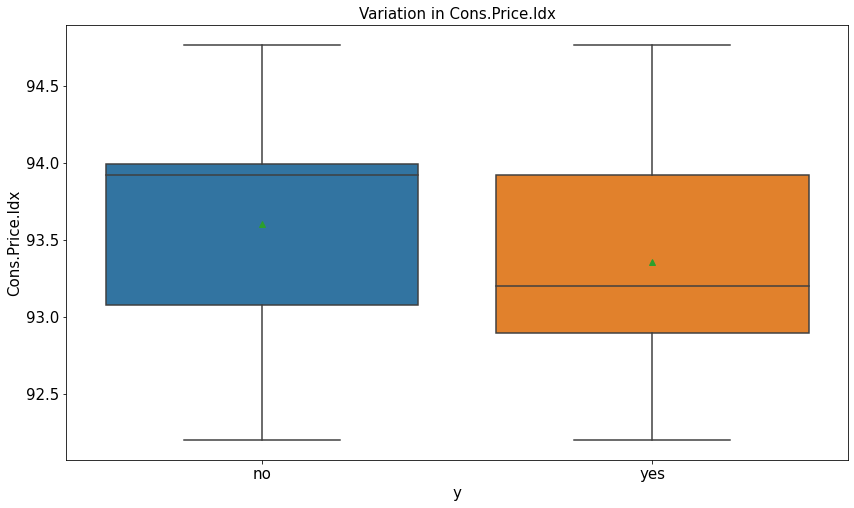

In [36]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'cons.price.idx', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Cons.Price.Idx', fontsize=15)
bca1.set_title('Variation in Cons.Price.Idx', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Cons.Conf.Idx

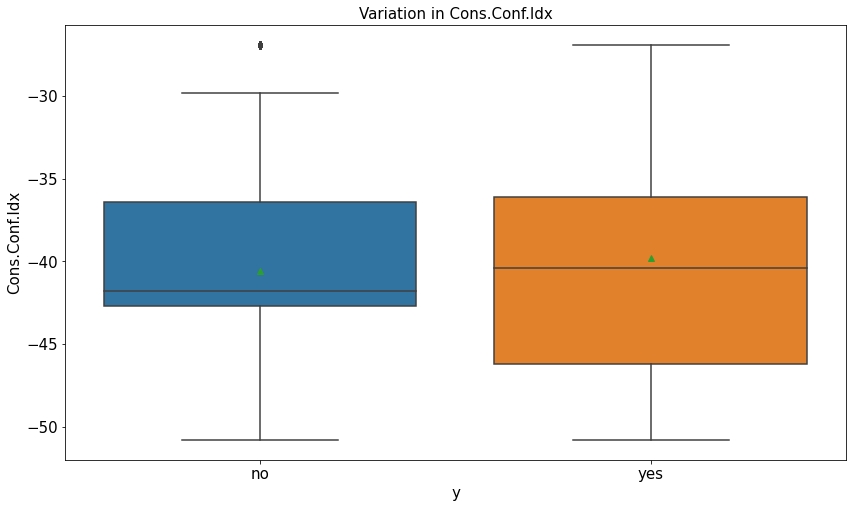

In [37]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'cons.conf.idx', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Cons.Conf.Idx', fontsize=15)
bca1.set_title('Variation in Cons.Conf.Idx', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Euribor3m

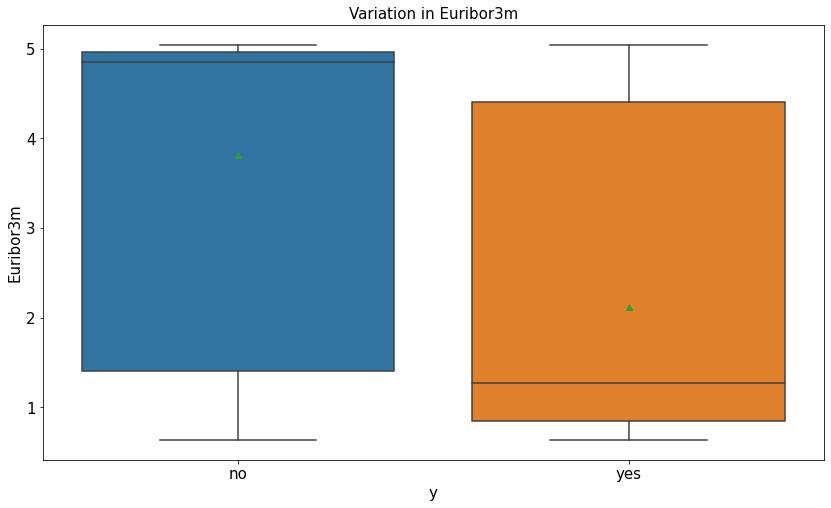

In [38]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'euribor3m', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Euribor3m', fontsize=15)
bca1.set_title('Variation in Euribor3m', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Nr.Employed

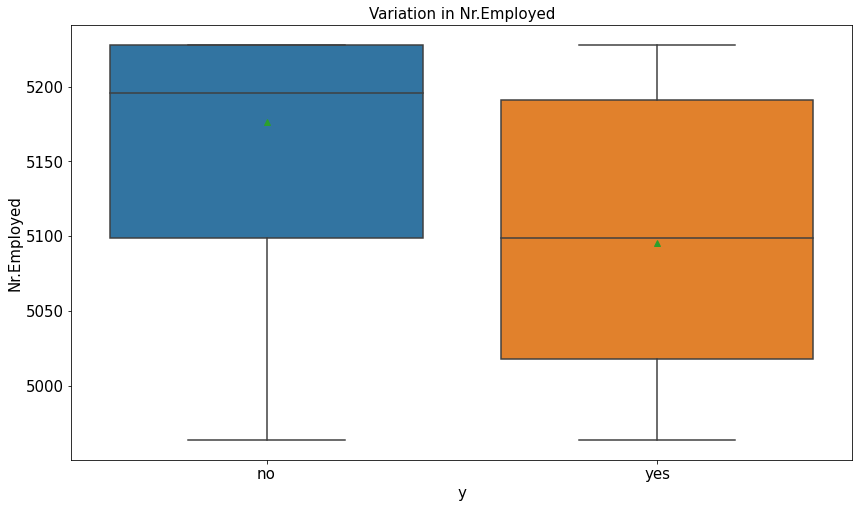

In [39]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'nr.employed', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Nr.Employed', fontsize=15)
bca1.set_title('Variation in Nr.Employed', fontsize=15)
bca1.tick_params(labelsize=15)

### Heatmap depicting correlation between all numerical variables

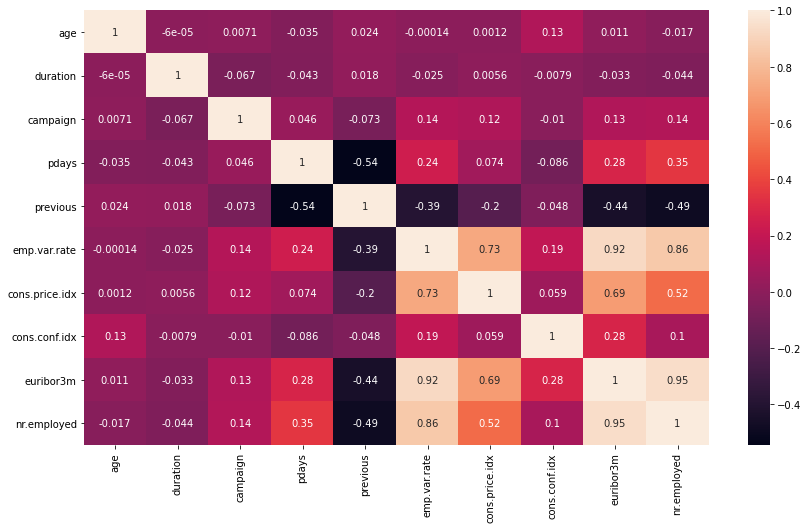

In [40]:
plt.subplots(figsize=(14,8))
sns.heatmap(bnk.corr(), annot=True)
plt.show()

## Encoding and storing target variable 'y'

#####  We perform one-hot-encoding on target variable 'y' in bnk dataframe as it is categorical data. We store the result in a new variable 'y'.

In [41]:
y = pd.get_dummies(bnk['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bnk.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.000000,999.000000,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,2.565889,999.000000,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.000000,999.000000,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.000000,962.597533,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.000000,999.000000,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Creating a new dataframe 'bank_client' 

#### We are creating the bank_client dataset to store information of bank clients. The attributes included are namely - age, job, marital, education, default, housing, loan.

In [42]:
bank_client = bnk.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [43]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41164 non-null  int64 
 1   job        41164 non-null  object
 2   marital    41164 non-null  object
 3   education  41164 non-null  object
 4   default    41164 non-null  object
 5   housing    41164 non-null  object
 6   loan       41164 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.8+ MB


In [44]:
bank_client.describe()

,age
count,41164.000000
mean,40.023540
std,10.420109
min,17.000000
25%,32.000000
50%,38.000000
75%,47.000000
max,98.000000


### Explorig variables in bank_client

### Age Count distribution

Text(0.5, 1.0, 'Age Count Distribution')

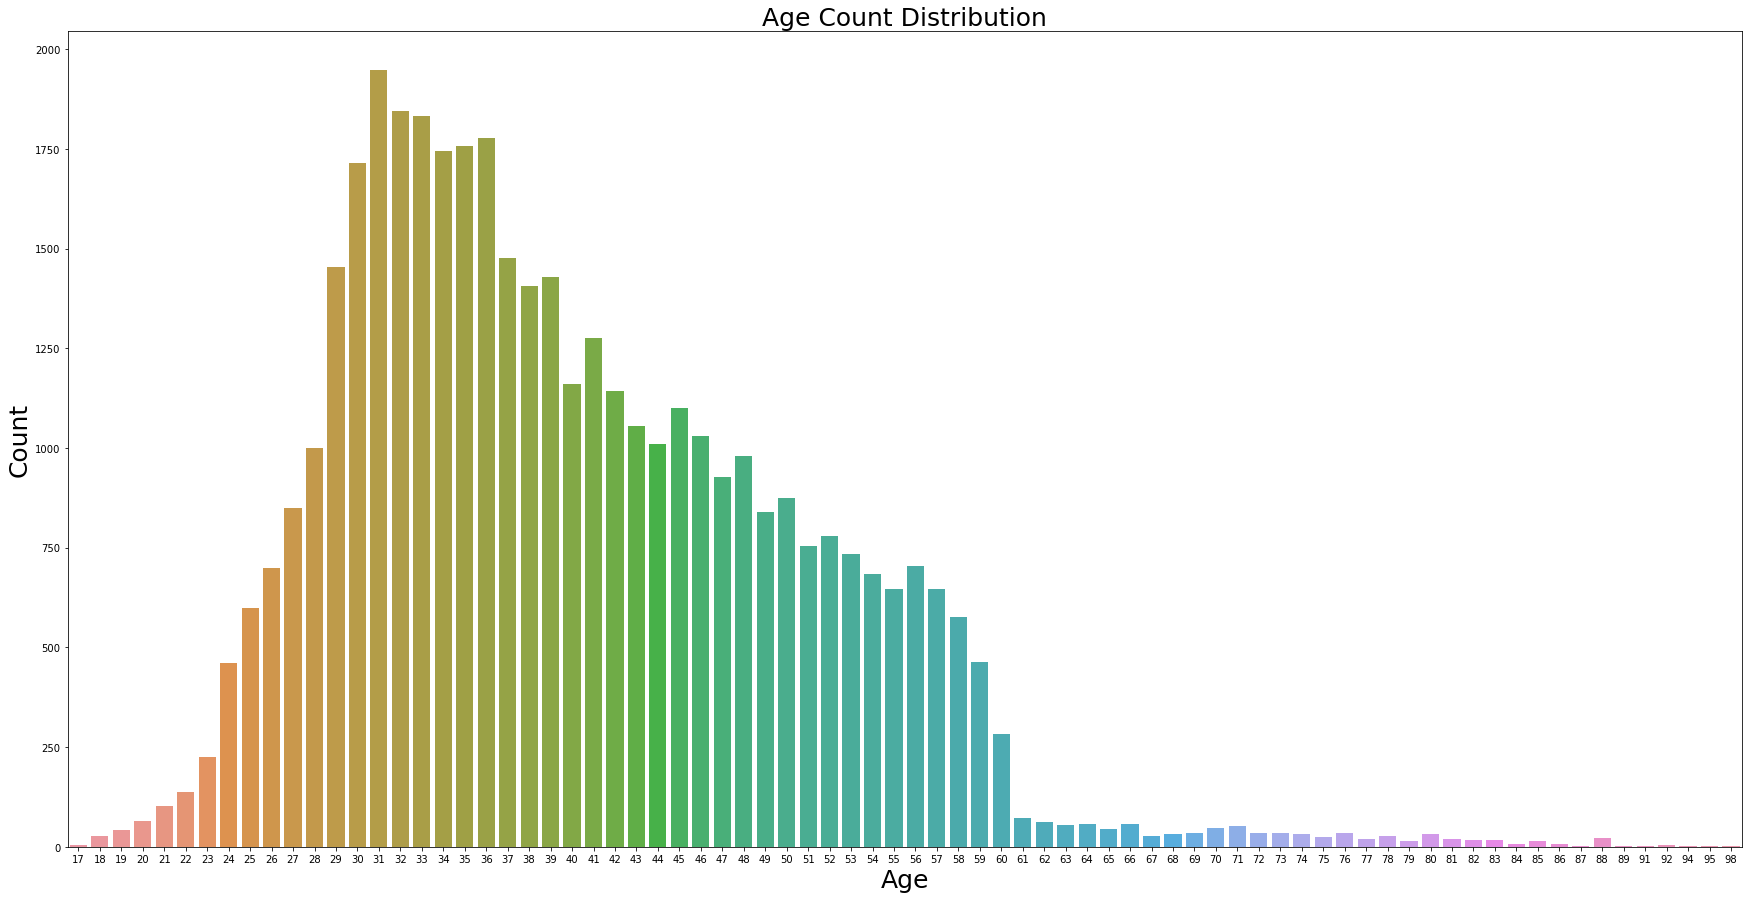

In [45]:
fig, bca = plt.subplots()
fig.set_size_inches(30, 15)
sns.countplot(x = 'age', data = bank_client)
bca.set_xlabel('Age', fontsize=25)
bca.set_ylabel('Count', fontsize=25)
bca.set_title('Age Count Distribution', fontsize=25)


### Age Distribution

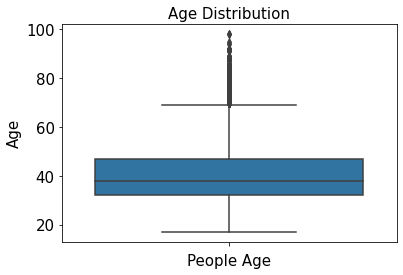

In [46]:
bca1 =sns.boxplot( y=bank_client["age"] )
bca1.set_xlabel('People Age', fontsize=15)
bca1.set_ylabel('Age', fontsize=15)
bca1.set_title('Age Distribution', fontsize=15)
bca1.tick_params(labelsize=15)

### Jobs Count Distribution

Text(0.5, 1.0, 'Jobs Count Distribution')

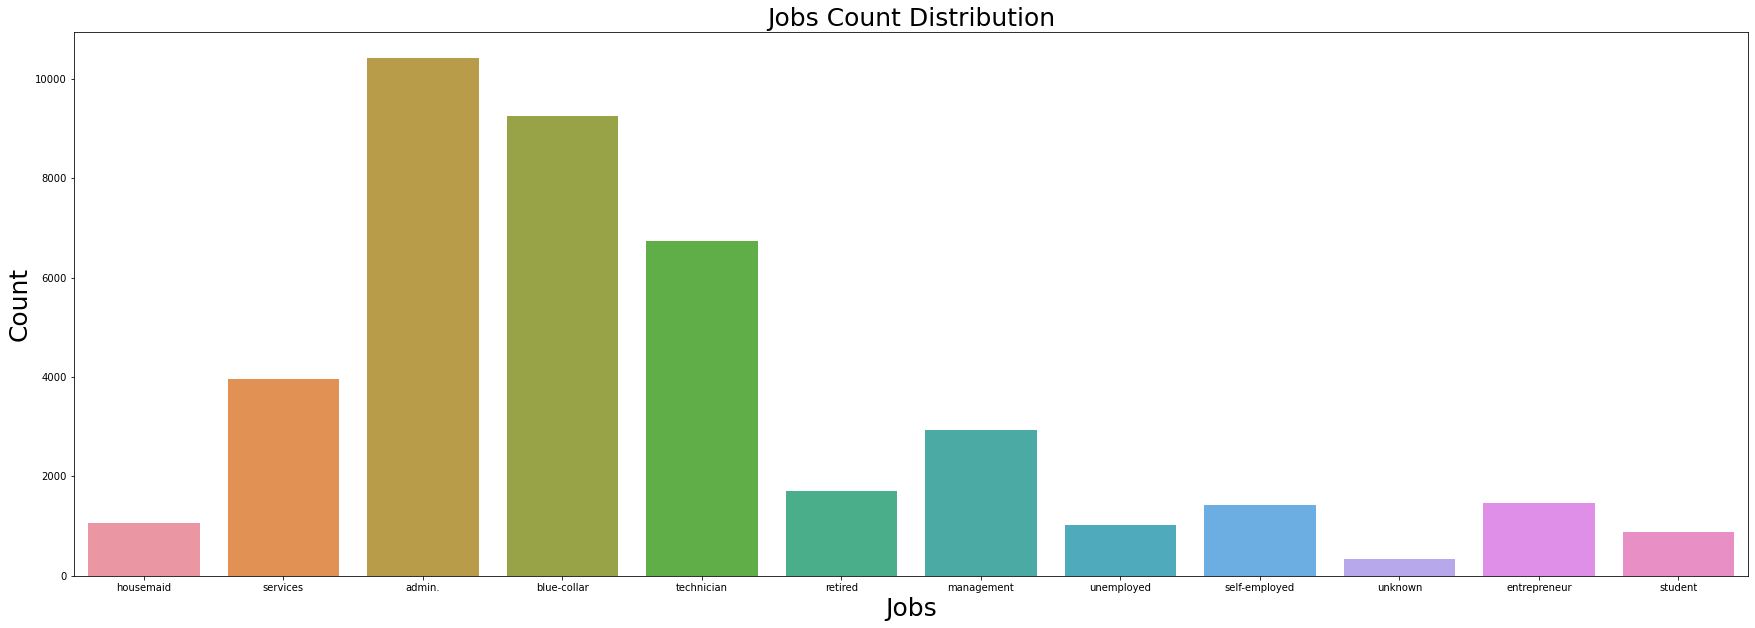

In [47]:
fig, bca = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'job', data = bank_client)
bca.set_xlabel('Jobs', fontsize=25)
bca.set_ylabel('Count', fontsize=25)
bca.set_title('Jobs Count Distribution', fontsize=25)

### Marital Status Count Distribution

Text(0.5, 1.0, 'Marital Status Count Distribution')

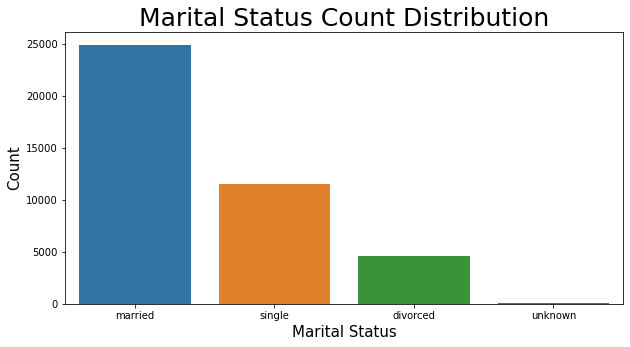

In [48]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
bca.set_xlabel('Marital Status', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Marital Status Count Distribution', fontsize=25)

### Education Count Distribution

Text(0.5, 1.0, 'Education Count Distribution')

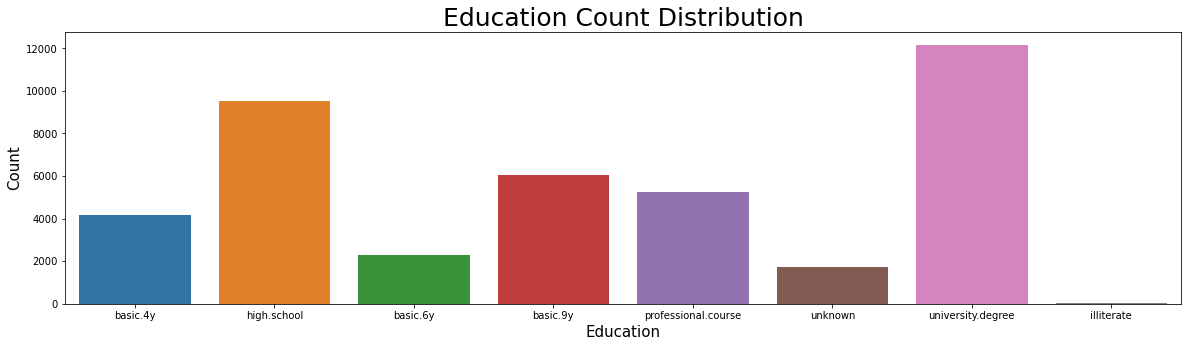

In [49]:
fig, bca = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
bca.set_xlabel('Education', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Education Count Distribution', fontsize=25)

### Housing Loan Count Distribution

Text(0.5, 1.0, 'Housing Loan Count Distribution')

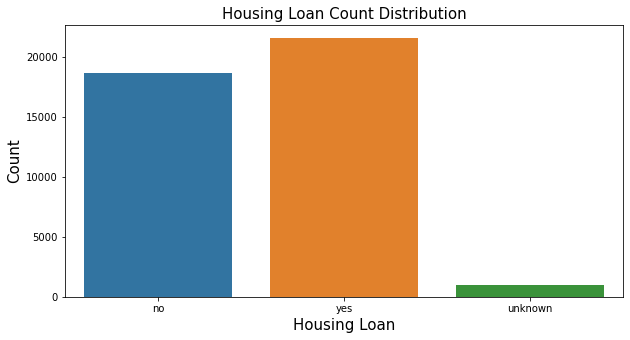

In [50]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'housing', data = bank_client)
bca.set_xlabel('Housing Loan', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Housing Loan Count Distribution', fontsize=15)

### Personal Loan Count Distribution

Text(0.5, 1.0, 'Personal Loan Count Distribution')

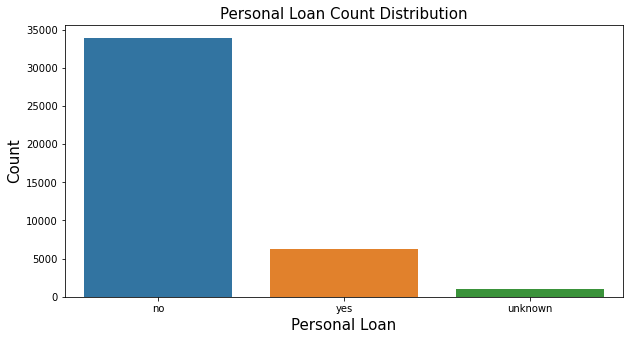

In [51]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'loan', data = bank_client)
bca.set_xlabel('Personal Loan', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Personal Loan Count Distribution', fontsize=15)

### Default Credit Count Distribution

Text(0.5, 1.0, 'Default Credit Count Distribution')

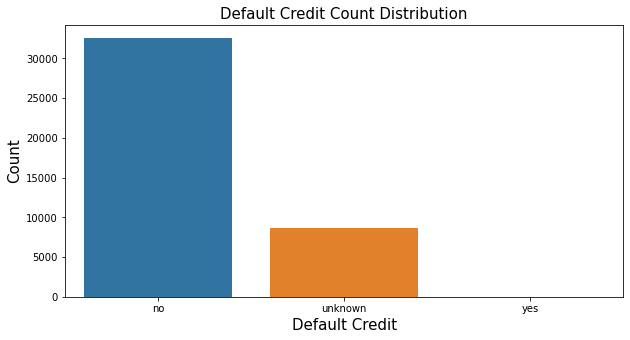

In [52]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'default', data = bank_client)
bca.set_xlabel('Default Credit', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Default Credit Count Distribution', fontsize=15)

In [53]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41164 non-null  int64  
 1   job             41164 non-null  object 
 2   marital         41164 non-null  object 
 3   education       41164 non-null  object 
 4   default         41164 non-null  object 
 5   housing         41164 non-null  object 
 6   loan            41164 non-null  object 
 7   contact         41164 non-null  object 
 8   month           41164 non-null  object 
 9   day_of_week     41164 non-null  object 
 10  duration        41164 non-null  float64
 11  campaign        41164 non-null  float64
 12  pdays           41164 non-null  float64
 13  previous        41164 non-null  float64
 14  poutcome        41164 non-null  object 
 15  emp.var.rate    41164 non-null  float64
 16  cons.price.idx  41164 non-null  float64
 17  cons.conf.idx   41164 non-null 

## Treating categorical variables

In [54]:
bank_client['job'].unique()


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [55]:
dummy = pd.get_dummies(bank_client['job'],prefix = 'Job_N')
print(dummy)

       Job_N_admin.  Job_N_blue-collar  Job_N_entrepreneur  Job_N_housemaid  \
0                 0                  0                   0                1   
1                 0                  0                   0                0   
2                 0                  0                   0                0   
3                 1                  0                   0                0   
4                 0                  0                   0                0   
...             ...                ...                 ...              ...   
41183             0                  0                   0                0   
41184             0                  1                   0                0   
41185             0                  0                   0                0   
41186             0                  0                   0                0   
41187             0                  0                   0                0   

       Job_N_management  Job_N_retired  Job_N_self-

In [56]:
bank_client = bank_client.join(dummy)
bank_client

,age,job,marital,education,default,housing,loan,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,Job_N_technician,Job_N_unemployed,Job_N_unknown
0,56,housemaid,married,basic.4y,no,no,no,0,0,0,1,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,0,0,0,0,0,0,0,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,0,0,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,0,0,0,0,0,1,0,0,0,0,0,0
41184,46,blue-collar,married,professional.course,no,no,no,0,1,0,0,0,0,0,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,0,0,0,0,0,1,0,0,0,0,0,0
41186,44,technician,married,professional.course,no,no,no,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
bank_client['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [58]:
lc=LabelEncoder()
bank_client['Marital_N']=lc.fit_transform(bank_client['marital'])
bank_client

,age,job,marital,education,default,housing,loan,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,Job_N_technician,Job_N_unemployed,Job_N_unknown,Marital_N
0,56,housemaid,married,basic.4y,no,no,no,0,0,0,1,0,0,0,0,0,0,0,0,1
1,57,services,married,high.school,unknown,no,no,0,0,0,0,0,0,0,1,0,0,0,0,1
2,37,services,married,high.school,no,yes,no,0,0,0,0,0,0,0,1,0,0,0,0,1
3,40,admin.,married,basic.6y,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,1
4,56,services,married,high.school,no,no,yes,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,0,0,0,0,0,1,0,0,0,0,0,0,1
41184,46,blue-collar,married,professional.course,no,no,no,0,1,0,0,0,0,0,0,0,0,0,0,1
41185,56,retired,married,university.degree,no,yes,no,0,0,0,0,0,1,0,0,0,0,0,0,1
41186,44,technician,married,professional.course,no,no,no,0,0,0,0,0,0,0,0,0,1,0,0,1


In [59]:
bank_client['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [60]:
bank_client=pd.concat((bank_client,pd.get_dummies(bank_client['education'])),axis=1)

In [61]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  41164 non-null  int64 
 1   job                  41164 non-null  object
 2   marital              41164 non-null  object
 3   education            41164 non-null  object
 4   default              41164 non-null  object
 5   housing              41164 non-null  object
 6   loan                 41164 non-null  object
 7   Job_N_admin.         41164 non-null  uint8 
 8   Job_N_blue-collar    41164 non-null  uint8 
 9   Job_N_entrepreneur   41164 non-null  uint8 
 10  Job_N_housemaid      41164 non-null  uint8 
 11  Job_N_management     41164 non-null  uint8 
 12  Job_N_retired        41164 non-null  uint8 
 13  Job_N_self-employed  41164 non-null  uint8 
 14  Job_N_services       41164 non-null  uint8 
 15  Job_N_student        41164 non-null  uint8 
 16  Job_

In [62]:
bank_client['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [63]:
bank_client['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [64]:
bank_client['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [65]:
lc=LabelEncoder()
bank_client['Default_N']=lc.fit_transform(bank_client['default'])

In [66]:
lc=LabelEncoder()
bank_client['Housing_N']=lc.fit_transform(bank_client['housing'])

In [67]:
lc=LabelEncoder()
bank_client['Loan_N']=lc.fit_transform(bank_client['loan'])

In [68]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  41164 non-null  int64 
 1   job                  41164 non-null  object
 2   marital              41164 non-null  object
 3   education            41164 non-null  object
 4   default              41164 non-null  object
 5   housing              41164 non-null  object
 6   loan                 41164 non-null  object
 7   Job_N_admin.         41164 non-null  uint8 
 8   Job_N_blue-collar    41164 non-null  uint8 
 9   Job_N_entrepreneur   41164 non-null  uint8 
 10  Job_N_housemaid      41164 non-null  uint8 
 11  Job_N_management     41164 non-null  uint8 
 12  Job_N_retired        41164 non-null  uint8 
 13  Job_N_self-employed  41164 non-null  uint8 
 14  Job_N_services       41164 non-null  uint8 
 15  Job_N_student        41164 non-null  uint8 
 16  Job_

In [69]:
bank_client = bank_client.drop(['job', 'marital', 'education', 'housing', 'default', 'loan'], axis = 1)

In [70]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  41164 non-null  int64
 1   Job_N_admin.         41164 non-null  uint8
 2   Job_N_blue-collar    41164 non-null  uint8
 3   Job_N_entrepreneur   41164 non-null  uint8
 4   Job_N_housemaid      41164 non-null  uint8
 5   Job_N_management     41164 non-null  uint8
 6   Job_N_retired        41164 non-null  uint8
 7   Job_N_self-employed  41164 non-null  uint8
 8   Job_N_services       41164 non-null  uint8
 9   Job_N_student        41164 non-null  uint8
 10  Job_N_technician     41164 non-null  uint8
 11  Job_N_unemployed     41164 non-null  uint8
 12  Job_N_unknown        41164 non-null  uint8
 13  Marital_N            41164 non-null  int32
 14  basic.4y             41164 non-null  uint8
 15  basic.6y             41164 non-null  uint8
 16  basic.9y             4

In [71]:
bank_client['age'] = bank_client['age'].astype(int)


In [72]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  41164 non-null  int32
 1   Job_N_admin.         41164 non-null  uint8
 2   Job_N_blue-collar    41164 non-null  uint8
 3   Job_N_entrepreneur   41164 non-null  uint8
 4   Job_N_housemaid      41164 non-null  uint8
 5   Job_N_management     41164 non-null  uint8
 6   Job_N_retired        41164 non-null  uint8
 7   Job_N_self-employed  41164 non-null  uint8
 8   Job_N_services       41164 non-null  uint8
 9   Job_N_student        41164 non-null  uint8
 10  Job_N_technician     41164 non-null  uint8
 11  Job_N_unemployed     41164 non-null  uint8
 12  Job_N_unknown        41164 non-null  uint8
 13  Marital_N            41164 non-null  int32
 14  basic.4y             41164 non-null  uint8
 15  basic.6y             41164 non-null  uint8
 16  basic.9y             4

In [73]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client) ;

In [74]:
bank_client.head()

,age,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,...,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,Default_N,Housing_N,Loan_N
0,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,2,0
3,2,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2


#### Correlation between variables in bank_client dataset

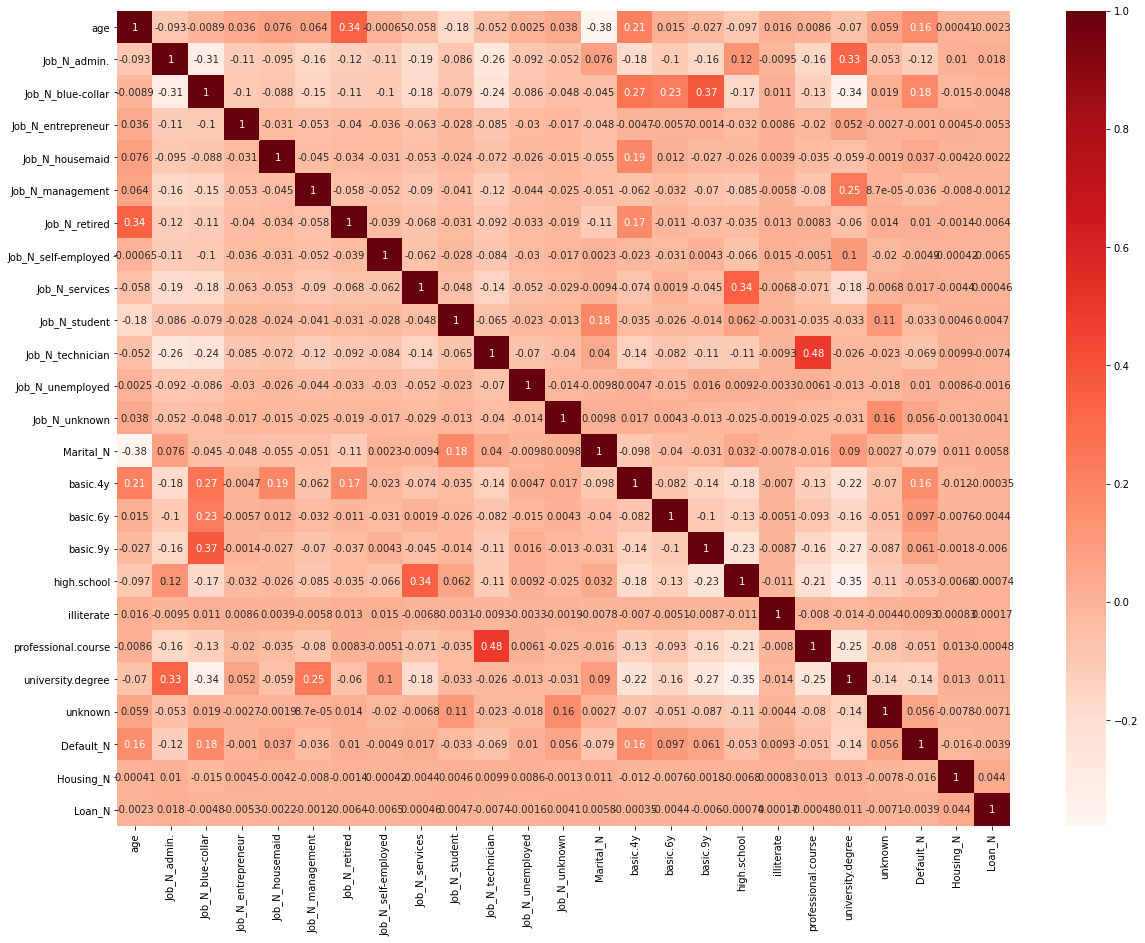

In [75]:
plt.figure(figsize=(20,15))
cor = bank_client.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Creating new dataset 'other_attr'

#### We are now creating a dataset to store the attributes - contact, month, day_of_week and duration.

In [76]:
other_attr = bnk.iloc[: , 7:11]
other_attr.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261.0
1,telephone,may,mon,149.0
2,telephone,may,mon,226.0
3,telephone,may,mon,151.0
4,telephone,may,mon,307.0


## Check for null values

In [77]:
other_attr.isnull().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

## Exploring the attributes in 'other_attr'

### Calls Duration

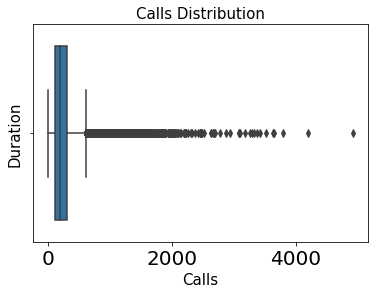

In [78]:
dur = sns.boxplot(x = 'duration', data = other_attr)
dur.set_xlabel('Calls', fontsize=15)
dur.set_ylabel('Duration', fontsize=15)
dur.set_title('Calls Distribution', fontsize=15)
dur.tick_params(labelsize=20)

### Contacts Count

Text(0.5, 1.0, 'Contacts Count')

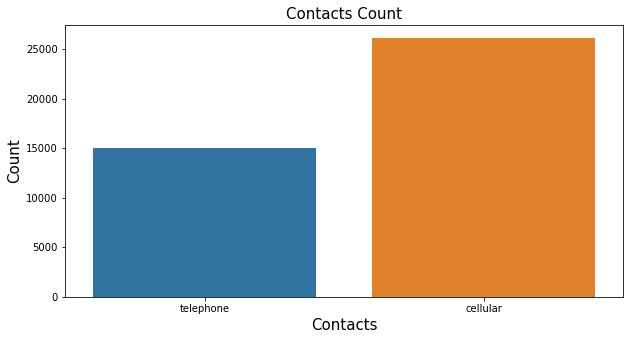

In [79]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'contact', data = other_attr)
bca.set_xlabel('Contacts', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Contacts Count', fontsize=15)

### Months Count

Text(0.5, 1.0, 'Months Count')

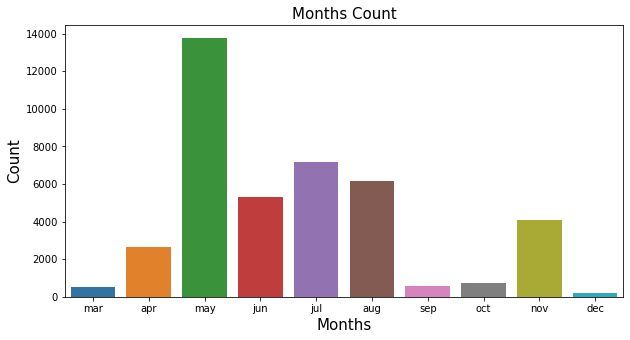

In [80]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'month', data = other_attr, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
bca.set_xlabel('Months', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Months Count', fontsize=15)

### Days Of Week Count

Text(0.5, 1.0, 'DaysOfWeek Count')

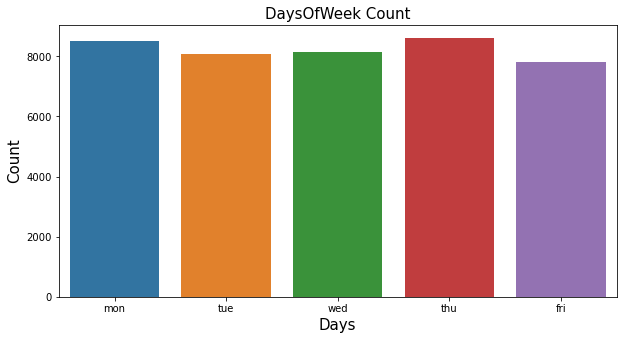

In [81]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'day_of_week', data = other_attr)
bca.set_xlabel('Days', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('DaysOfWeek Count', fontsize=15)

## Treating categorical variables

In [82]:
other_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   contact      41164 non-null  object 
 1   month        41164 non-null  object 
 2   day_of_week  41164 non-null  object 
 3   duration     41164 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.8+ MB


In [83]:
other_attr['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [84]:
other_attr['contact'] = other_attr['contact'].map({'telephone':1, 'cellular':2}).astype(int)

In [85]:
other_attr['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [86]:
other_attr["month"] = other_attr["month"].str.capitalize()

In [87]:
other_attr["month"] = pd.to_datetime(other_attr.month, format='%b', errors='coerce').dt.month
other_attr = other_attr.sort_values(by="month")

In [88]:
other_attr['month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [89]:
other_attr['day_of_week'].unique()

array(['tue', 'mon', 'thu', 'wed', 'fri'], dtype=object)

In [90]:
lc=LabelEncoder()
other_attr['day_of_week']=lc.fit_transform(other_attr['day_of_week'])

In [91]:
other_attr['day_of_week'].unique()

array([3, 1, 2, 4, 0])

In [92]:
other_attr['duration'] = other_attr['duration'].astype(int)

## Creating new dataset 'cont_attr'

##### Here we are creating a new dataset for the social and economic context attributes, which are - emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.

In [93]:
cont_attr= bnk.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
cont_attr.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


## Creating a dataset 'remain_attr'

##### This dataset contains all the remaining attributes ( y excluded). These are - campaign, pdays, previous, poutcome

In [94]:
remain_attr = bnk.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
remain_attr.head()

,campaign,pdays,previous,poutcome
0,1.000000,999.000000,0.0,nonexistent
1,2.565889,999.000000,0.0,nonexistent
2,1.000000,999.000000,0.0,nonexistent
3,1.000000,962.597533,0.0,nonexistent
4,1.000000,999.000000,0.0,nonexistent


### Treating the categorical attributes

In [95]:
remain_attr['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [96]:
remain_attr['poutcome'] = remain_attr['poutcome'].map({'nonexistent':1, 'failure':2, 'success':3}).astype(int)

## Creating the 'final_bank' dataset

#### We will now merge/concat all the above datasets that we created and curated as per need into one final dataset for our analysis.

In [97]:
final_bank= pd.concat([bank_client, other_attr, cont_attr, remain_attr], axis = 1)


### Exploring the dataset

In [98]:
final_bank.shape

(41164, 38)

In [99]:
final_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41164 non-null  int32  
 1   Job_N_admin.         41164 non-null  uint8  
 2   Job_N_blue-collar    41164 non-null  uint8  
 3   Job_N_entrepreneur   41164 non-null  uint8  
 4   Job_N_housemaid      41164 non-null  uint8  
 5   Job_N_management     41164 non-null  uint8  
 6   Job_N_retired        41164 non-null  uint8  
 7   Job_N_self-employed  41164 non-null  uint8  
 8   Job_N_services       41164 non-null  uint8  
 9   Job_N_student        41164 non-null  uint8  
 10  Job_N_technician     41164 non-null  uint8  
 11  Job_N_unemployed     41164 non-null  uint8  
 12  Job_N_unknown        41164 non-null  uint8  
 13  Marital_N            41164 non-null  int32  
 14  basic.4y             41164 non-null  uint8  
 15  basic.6y             41164 non-null 

In [100]:
final_bank.isna().sum()

age                    0
Job_N_admin.           0
Job_N_blue-collar      0
Job_N_entrepreneur     0
Job_N_housemaid        0
Job_N_management       0
Job_N_retired          0
Job_N_self-employed    0
Job_N_services         0
Job_N_student          0
Job_N_technician       0
Job_N_unemployed       0
Job_N_unknown          0
Marital_N              0
basic.4y               0
basic.6y               0
basic.9y               0
high.school            0
illiterate             0
professional.course    0
university.degree      0
unknown                0
Default_N              0
Housing_N              0
Loan_N                 0
contact                0
month                  0
day_of_week            0
duration               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
campaign               0
pdays                  0
previous               0
poutcome               0
dtype: int64

In [101]:
final_bank['campaign'].unique()

array([ 1.        ,  2.56588897,  2.        ,  3.        ,  4.        ,
        5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
       10.        , 12.        , 13.        , 11.        , 19.        ,
       18.        , 23.        , 14.        , 25.        , 16.        ,
       17.        , 15.        , 22.        , 20.        , 56.        ,
       39.        , 35.        , 28.        , 26.        , 32.        ,
       21.        , 24.        , 29.        , 31.        , 30.        ,
       27.        , 41.        , 40.        , 33.        , 43.        ,
       34.        ])

In [102]:
final_bank['campaign'].fillna(final_bank['campaign'].mean(),inplace=True)

In [103]:
final_bank.isna().sum()

age                    0
Job_N_admin.           0
Job_N_blue-collar      0
Job_N_entrepreneur     0
Job_N_housemaid        0
Job_N_management       0
Job_N_retired          0
Job_N_self-employed    0
Job_N_services         0
Job_N_student          0
Job_N_technician       0
Job_N_unemployed       0
Job_N_unknown          0
Marital_N              0
basic.4y               0
basic.6y               0
basic.9y               0
high.school            0
illiterate             0
professional.course    0
university.degree      0
unknown                0
Default_N              0
Housing_N              0
Loan_N                 0
contact                0
month                  0
day_of_week            0
duration               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
campaign               0
pdays                  0
previous               0
poutcome               0
dtype: int64

In [104]:
final_bank.describe()

,age,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,...,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
count,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,...,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000
mean,1.978598,0.253037,0.224759,0.035371,0.025751,0.071033,0.041687,0.034520,0.096322,0.021256,...,258.707852,0.076238,93.575775,-40.503127,3.621296,5167.033828,2.565889,962.597533,0.172794,1.170003
std,0.735708,0.434757,0.417429,0.184717,0.158392,0.256883,0.199875,0.182564,0.295036,0.144240,...,253.510582,1.489162,0.578838,4.627522,1.734427,72.251200,2.609909,177.026646,0.483005,0.455868
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,106.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.000000,999.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,190.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2.000000,999.000000,0.000000,1.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,308.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.000000,999.000000,0.000000,1.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4918.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,56.000000,999.000000,7.000000,3.000000


## Splitting the data

##### We already have our target variable stored in 'y' from the beginning. Also, we have seperately curated our final_bank dataset. So, it does not contain our target variable y from our original dataset.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_bank,y, test_size = 0.2, random_state = 0)

In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [107]:
X_train.head()

,age,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,...,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
20018,2,0,0,0,0,0,0,0,0,0,...,314,1.400000,93.444,-36.1,4.966,5228.1,3.0,999.000000,0.000000,1
39695,1,1,0,0,0,0,0,0,0,0,...,30,-1.800000,93.876,-40.0,0.690,5008.7,1.0,999.000000,0.000000,1
17238,3,0,0,0,1,0,0,0,0,0,...,356,0.076238,93.918,-42.7,4.962,5228.1,9.0,999.000000,0.000000,1
5924,3,0,1,0,0,0,0,0,0,0,...,67,1.100000,93.994,-36.4,4.857,5191.0,3.0,999.000000,0.172794,1
34656,2,1,0,0,0,0,0,0,0,0,...,213,-1.800000,92.893,-46.2,1.266,5099.1,1.0,962.597533,0.000000,1


## Scaling the data

#### In our final_bank data, we can see that the minimum and maimum value ranges from quite high to quite low values. For this reason, we are scaling our data with StandardScaler. We do so to scale our features centred around the zero and have unit variance.

In [108]:
#train-test split
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Models

## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() 
log_model.fit(X_train,y_train)
log_pred = log_model.predict(X_test)

### Model Evaluation

In [110]:
print(confusion_matrix(y_test, log_pred))
from sklearn.metrics import classification_report
print(classification_report(y_train, log_model.predict(X_train)))

[[7125  183]
 [ 569  356]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29218
           1       0.67      0.39      0.49      3713

    accuracy                           0.91     32931
   macro avg       0.80      0.68      0.72     32931
weighted avg       0.90      0.91      0.90     32931



In [111]:
lr_score_train = log_model.score(X_train,y_train)
lr_score_train

0.9092951929792596

In [112]:
lr_score_test = log_model.score(X_test,y_test)
lr_score_test

0.9086602696465444

## KNN Classification

In [113]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

In [114]:
X_train_K, X_test_K, y_train_K, y_test_K = train_test_split(final_bank, y, test_size = 0.2, random_state = 0)

In [115]:
neighbors = np.arange(0,25)

In [116]:
cv_scores = []

k=1 88.18 (+/- 0.61)
k=2 89.65 (+/- 0.61)
k=3 89.91 (+/- 0.50)
k=4 90.19 (+/- 0.53)
k=5 90.29 (+/- 0.46)
k=6 90.44 (+/- 0.40)
k=7 90.51 (+/- 0.44)
k=8 90.60 (+/- 0.40)
k=9 90.58 (+/- 0.51)
k=10 90.68 (+/- 0.54)
k=11 90.67 (+/- 0.50)
k=12 90.75 (+/- 0.57)
k=13 90.70 (+/- 0.47)
k=14 90.71 (+/- 0.46)
k=15 90.81 (+/- 0.44)
k=16 90.87 (+/- 0.50)
k=17 90.94 (+/- 0.53)
k=18 90.90 (+/- 0.52)
k=19 90.97 (+/- 0.56)
k=20 90.95 (+/- 0.54)
k=21 90.98 (+/- 0.56)
k=22 90.98 (+/- 0.55)
k=23 91.01 (+/- 0.50)
k=24 90.97 (+/- 0.50)
k=25 91.00 (+/- 0.56)
The optimal number of neighbors is 22 with 91.0%


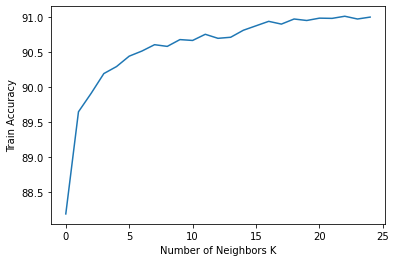

In [117]:
# To determine best k-value 
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train_K, y_train_K, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### Model Evaluation

In [119]:
# for train data
from sklearn.metrics import classification_report
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29218
           1       0.70      0.25      0.36      3713

    accuracy                           0.90     32931
   macro avg       0.81      0.62      0.66     32931
weighted avg       0.89      0.90      0.88     32931



In [120]:
knn_score_train = knn.score(X_train,y_train)
knn_score_train

0.9031915216665148

In [128]:
# for test data
confusion_matrix(y_test, knn.predict(X_test))

array([[7192,  116],
       [ 731,  194]], dtype=int64)

In [121]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.67      0.22      0.33       925

    accuracy                           0.90      8233
   macro avg       0.79      0.60      0.64      8233
weighted avg       0.88      0.90      0.88      8233



In [122]:
knn_score_test = knn.score(X_test,y_test)
knn_score_test

0.9001579011296004

## Linear SVM

In [123]:
from sklearn.svm import LinearSVC

In [124]:
svm = LinearSVC()
svm.fit(X_train,y_train)
svc_pred = svm.predict(X_test)

### Model Evaluation

In [125]:
# for train set
from sklearn.metrics import classification_report
print(classification_report(y_train, svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29218
           1       0.69      0.34      0.46      3713

    accuracy                           0.91     32931
   macro avg       0.81      0.66      0.70     32931
weighted avg       0.90      0.91      0.89     32931



In [126]:
#for test set
from sklearn.metrics import classification_report
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7308
           1       0.67      0.33      0.45       925

    accuracy                           0.91      8233
   macro avg       0.80      0.66      0.70      8233
weighted avg       0.89      0.91      0.89      8233



In [127]:
svm_score_test = svm.score(X_test,y_test)
svm_score_test

0.9069597959431556

In [128]:
svm_score_train = svm.score(X_train,y_train)
svm_score_train

0.9085056633567156

## Kernalized SVM (linear, rbf and poly)

In [129]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]},
                   {'kernel' : ['poly'], 'degree':[3], 'C':[10] }]


### GridSearch on Kernalized SVM

In [130]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']},
                         {'C': [10], 'degree': [3], 'kernel': ['poly']}],
             scoring='precision')

In [131]:
print(clf.cv_results_)

{'mean_fit_time': array([ 97.84843421, 197.8769908 ,  76.38697162]), 'std_fit_time': array([ 10.23216916, 249.55834225,   5.539503  ]), 'mean_score_time': array([6.21141558, 2.67750535, 2.90051346]), 'std_score_time': array([0.03838849, 0.03992848, 0.08675292]), 'param_C': masked_array(data=[1, 1, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, --, --],
             mask=[False,  True,  True],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear', 'poly'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_degree': masked_array(data=[--, --, 3],
             mask=[ True,  True, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'degree': 3, 'kernel': 'poly'}], 'split0_test_score': array([0.65930599, 0.63957597,

In [132]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'kernel': 'linear'}
This model produces a mean cross-validated score (precision) of 0.6395407281224429


In [133]:
svm_ker_lin = SVC(kernel='linear', C=1)
svm_ker_rbf = SVC(kernel='rbf', gamma=0.1, C=1)
svm_ker_poly = SVC(kernel='poly', degree=3, C=10)

In [134]:
svm_ker_lin.fit(X_train, y_train)
svm_ker_rbf.fit(X_train, y_train)
svm_ker_poly.fit(X_train, y_train)

ker_lin_pred = svm.predict(X_test)
ker_rbf_pred = svm.predict(X_test)
ker_poly_pred = svm.predict(X_test)

### Model Evaluation 

In [136]:
print(classification_report(y_train, svm_ker_lin.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     29218
           1       0.64      0.26      0.37      3713

    accuracy                           0.90     32931
   macro avg       0.78      0.62      0.66     32931
weighted avg       0.88      0.90      0.88     32931



In [137]:
print(classification_report(y_train, svm_ker_rbf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29218
           1       0.92      0.59      0.72      3713

    accuracy                           0.95     32931
   macro avg       0.94      0.79      0.84     32931
weighted avg       0.95      0.95      0.94     32931



In [138]:
print(classification_report(y_train, svm_ker_poly.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29218
           1       0.85      0.61      0.71      3713

    accuracy                           0.94     32931
   macro avg       0.90      0.80      0.84     32931
weighted avg       0.94      0.94      0.94     32931



In [139]:
print(classification_report(y_test, svm_ker_poly.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7308
           1       0.60      0.42      0.50       925

    accuracy                           0.90      8233
   macro avg       0.77      0.69      0.72      8233
weighted avg       0.89      0.90      0.90      8233



In [140]:
print(classification_report(y_test, svm_ker_lin.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7308
           1       0.66      0.26      0.37       925

    accuracy                           0.90      8233
   macro avg       0.79      0.62      0.66      8233
weighted avg       0.88      0.90      0.88      8233



In [141]:
print(classification_report(y_test, svm_ker_rbf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7308
           1       0.63      0.31      0.42       925

    accuracy                           0.90      8233
   macro avg       0.78      0.65      0.68      8233
weighted avg       0.89      0.90      0.89      8233



In [142]:
svm_ker_lin_score_train = svm_ker_lin.score(X_train,y_train)
svm_ker_lin_score_train

0.8997904709847864

In [143]:
svm_ker_lin_score_test = svm_ker_lin.score(X_test,y_test)
svm_ker_lin_score_test

0.9016154500182194

In [144]:
svm_ker_rbf_score_train = svm_ker_rbf.score(X_train,y_train)
svm_ker_rbf_score_train

0.9478303118642009

In [145]:
svm_ker_rbf_score_test = svm_ker_rbf.score(X_test,y_test)
svm_ker_rbf_score_test

0.9025871492772987

In [146]:
svm_ker_poly_score_train = svm_ker_poly.score(X_train,y_train)
svm_ker_poly_score_train

0.9445810938021925

In [147]:
svm_ker_poly_score_test = svm_ker_poly.score(X_test,y_test)
svm_ker_poly_score_test

0.9038017733511479

## Decision Tree Classifier

In [148]:
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=0) 
d_tree.fit(X_train, y_train)
d_tree_pred = d_tree.predict(X_test)

### Model Evaluation

In [149]:
print(classification_report(y_test, d_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7308
           1       0.53      0.53      0.53       925

    accuracy                           0.89      8233
   macro avg       0.73      0.74      0.73      8233
weighted avg       0.89      0.89      0.89      8233



In [150]:
print(classification_report(y_train, d_tree.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29218
           1       1.00      1.00      1.00      3713

    accuracy                           1.00     32931
   macro avg       1.00      1.00      1.00     32931
weighted avg       1.00      1.00      1.00     32931



In [151]:
d_tree_score_train = d_tree.score(X_train,y_train)
d_tree_score_train

0.9999696334760559

In [152]:
d_tree_score_test = d_tree.score(X_test,y_test)
d_tree_score_test

0.8933560063160452

In [153]:
print("Train scores for our models are as follows :" )
print(" Logistric Regression : " , lr_score_train)
print(" KNN Classification : " , knn_score_train)
print(" Linear SVM : " , svm_score_train)
print(" Kernalized SVM  : " , svm_ker_lin_score_train) #since kernel is our best model, we will consider it's score
print(" Decision Tree Classifier : " , d_tree_score_train)

Train scores for our models are as follows :
 Logistric Regression :  0.9092951929792596
 KNN Classification :  0.9031915216665148
 Linear SVM :  0.9085056633567156
 Kernalized SVM  :  0.8997904709847864
 Decision Tree Classifier :  0.9999696334760559


In [154]:
print("Test scores for our models are as follows :" )
print(" Logistric Regression : " , lr_score_test)
print(" KNN Classification : " , knn_score_test)
print(" Linear SVM : " , svm_score_test)
print(" Kernalized SVM  : " , lr_score_test)
print(" Decision Tree Classifier : " , d_tree_score_test)

Test scores for our models are as follows :
 Logistric Regression :  0.9086602696465444
 KNN Classification :  0.9001579011296004
 Linear SVM :  0.9069597959431556
 Kernalized SVM  :  0.9086602696465444
 Decision Tree Classifier :  0.8933560063160452


## Comparing the F-1 scores of all the models, we can see that the F-1 score for Kernelized SVM(poly) model and Kernelized SVM(rbf) the F-1  train set is the highest- 0.97.  Also, for the test set it is the highest - 0.95. A  higher F-1 score indicates a better model. Thus, we are choosing F-1 score for evaluation as  it summarizes both - precision and recall evaluation strategies. In a way we can consider it as the harmonic mean of the two measures. 

## So, the Kernelized SVM (rbf, poly) are both equally best classification models for our dataset.